<a href="https://colab.research.google.com/github/lexxai/goit_python_ds_hw_09/blob/main/goit_python_ds_hw_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Модуль 9. Підбір гіперпараметрів НМ

*З циклу [домашніх завдань Python Data Science](https://github.com/lexxai/goit_python_data_sciense_homework).*

# Домашнє завдання

## Про датасет Fashion-MNIST

Дану нейромережу ми будемо вивчати на датасеті Fashion-MNIST.
Fashion-MNIST - це набір даних зображень статей Zalando, що складається з навчального набору з 60 000 прикладів і тестового набору з 10 000 прикладів. Кожен приклад - це зображення 28x28 у відтінках сірого, пов'язане з міткою з 10 класів. Кожен піксель приймає значення від 0 до 255.

**Label	Description**

| Label | Clothing Item | --- | Label | Clothing Item | --- | Label | Clothing Item | --- | Label | Clothing Item | --- | Label | Clothing Item |
|-------|---------------|-----|-------|---------------|-----|-------|---------------|-----|-------|---------------|-----|-------|---------------|
| 0     | T-shirt/top   |     | 2     | Pullover      |     | 4     | Coat          |     | 6     | Shirt         |     | 8     | Bag           |
| 1     | Trouser       |     | 3     | Dress         |     | 5     | Sandal        |     | 7     | Sneaker       |     | 9     | Ankle boot    |





In [75]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

from keras import optimizers, regularizers
from keras import losses, metrics
from keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## Завантажуємо датасет

In [76]:
# from tensorflow.keras.datasets import mnist
from keras.datasets import fashion_mnist

# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [77]:
num_classes = 10 # загальна кількість класів
learning_rate = 0.001 # швидкість навчання нейронної мережі
num_features = x_train.shape[1] * x_train.shape[2] # кількість атрибутів вхідного вектора 28 * 28 = 784
num_features

784

In [78]:
labels = ['T-shirt/top', 'Trouser', "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
labels_uk = ["Футболка/топ", "Штани", "Пуловер", "Сукня", "Пальто", "Босоніжки", "Сорочка", "Кросівки", "Сумка", "Черевики"]

In [79]:
# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

In [80]:
x_train.shape[1:]

(28, 28)

## Створення моделей НМ

In [114]:
n_hidden_1 = 256 # кількість нейронів 1-го шару
n_hidden_2 = 512 # кількість нейронів 2-го шару
n_hidden_3 = 16 # кількість нейронів 3-го шару

models = {}
models_his = {}
results = {}

### Додаємо модель НМ версії 1 з  L2 (.025)



In [118]:
model_name = "Model_1_L2_0.025"

kernel_regularizer=regularizers.l2(0.025)

models[model_name] = Sequential([
    # Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    # MaxPooling2D(2, 2),
    # Flatten(), leaky_relu
    Flatten(input_shape=x_train.shape[1:], name="INPUT"),
    Dense(n_hidden_1, activation='relu', name="Hidden_Layer_1"),
    # Dropout(0.5),
    Dense(n_hidden_2, activation='relu', kernel_regularizer=kernel_regularizer, name="Hidden_Layer_2"),
    Dense(256, activation='relu', name="Hidden_Layer_3"),
    Dense(32, activation='relu', name="Hidden_Layer_4"),
    # Dense(n_hidden_3, activation='relu', name="Hidden_Layer_3"),
    Dense(num_classes, activation='softmax', name="OUTPUT"),
],name=model_name)

# model.compile(
#     optimizer=optimizers.Adam(learning_rate=learning_rate),
#     loss='sparse_categorical_crossentropy',
#     metrics=["accuracy"]
# )

# model.summary()
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Навчання моделі НМ

In [82]:
def get_callbacks(name):
    # Define early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=accurqcy_patience, verbose=1, restore_best_weights=True)

    # Define model checkpoint callback to save the best model
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=f"{name}_best_model.h5",
                                                           monitor='val_accuracy',
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           verbose=1)

    return [early_stopping, model_checkpoint]


def compile_and_fit(model, name, batch_size=512, learning_rate=0.001, max_epochs=10000):
  model.compile(
      optimizer=optimizers.Adam(learning_rate=learning_rate),
      loss='sparse_categorical_crossentropy',
      metrics=["accuracy"]
  )
  model.summary()
  history = model.fit(
      x_train,
      y_train,
      #initial_epoch=0,
      epochs=max_epochs,
      batch_size=batch_size,
      validation_data=(x_test, y_test),
      callbacks=get_callbacks(name),
      use_multiprocessing=True
  )
  return history

In [119]:
batch_size = 450 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
epochs = 60
accurqcy_patience = 10

models[model_name].reset_states()
models_his[model_name] = compile_and_fit(models[model_name], model_name, batch_size=batch_size, max_epochs=epochs)

Model: "Model_1_L2_0.025"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (Flatten)             (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 256)               200960    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 512)               131584    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 256)               131328    
                                                                 
 Hidden_Layer_4 (Dense)      (None, 32)                8224      
                                                                 
 OUTPUT (Dense)              (None, 10)                330       
                                                                 
Total params: 472426 (1.80 MB)
Trainable params: 4

## Аналіз результатів

In [120]:
results[model_name] = models[model_name].evaluate(x_test, y_test, verbose=True)
print(results[model_name])

313/313 [==============================] - 1s 3ms/step - loss: 0.3598 - accuracy: 0.8896
[0.3598392903804779, 0.8895999789237976]


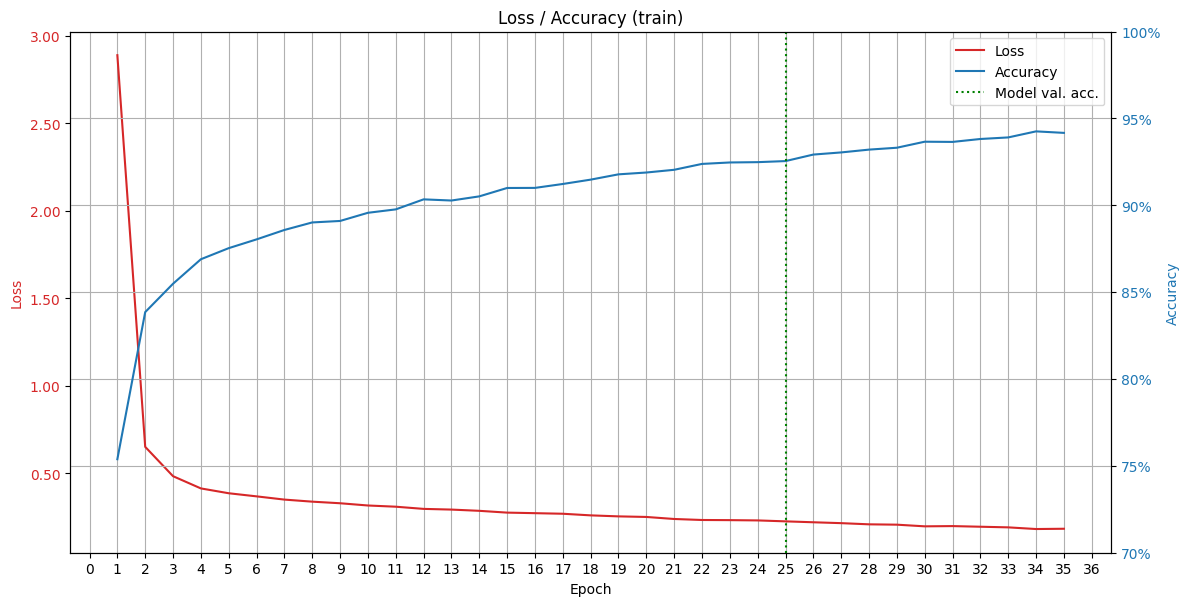

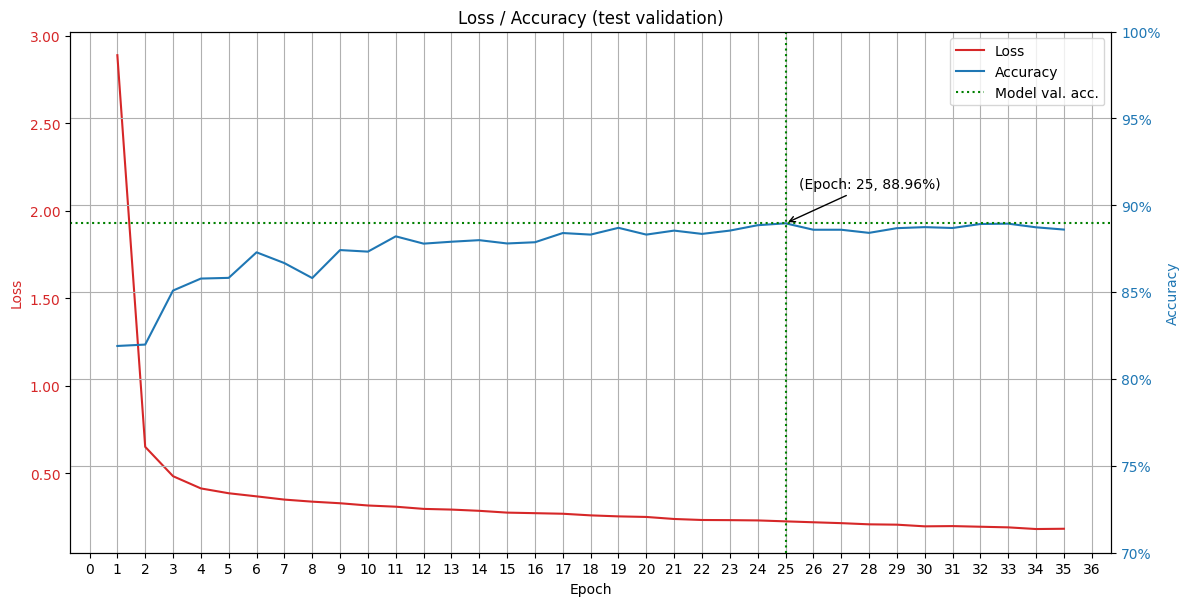

In [121]:
def pair_plot(loss_history, accuracy_history, title, closest_index = None, model_accuracy=None):

  fig, ax1 = plt.subplots()
  fig.set_size_inches((12,6))

  color = 'tab:red'
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss', color=color)
  ax1.plot(loss_history, color=color, label="Loss")
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int((x + 1))))
  if len(loss_history) < 40 :
    ax1.xaxis.set_major_locator(MultipleLocator(1))
  ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{(y):.2f}'))
  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
  p2=ax2.plot(accuracy_history, color=color, label="Accuracy")
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
  ax2.grid()
  ax1.xaxis.grid(True)
  ax2.set_ylim([0.7, 1.0])

  if closest_index:
    ax2.axvline(x=closest_index, color='green', linestyle='dotted', label="Model val. acc.")
    if model_accuracy:
      ax2.axhline(y=model_accuracy, color='green', linestyle='dotted')
      intersection_text = f'(Epoch: {closest_index+1}, {model_accuracy:.2%})'
      ax2.annotate(intersection_text, xy=(closest_index, model_accuracy), xytext=(closest_index + 0.5, model_accuracy + 0.02),
                  arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)


  # Combine the legends from ax1 and ax2
  lines, labels_ = ax1.get_legend_handles_labels()
  lines2, labels2 = ax2.get_legend_handles_labels()
  ax2.legend(lines + lines2, labels_ + labels2, loc='best')

  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  plt.title(title)
  plt.show()

loss_history = models_his[model_name].history['loss']
accuracy_history = models_his[model_name].history['accuracy']
val_loss_history = models_his[model_name].history['loss']
val_accuracy_history = models_his[model_name].history['val_accuracy']

closest_epoch_index = np.argmin(np.abs(np.array(val_accuracy_history) - results[model_name][1]))


pair_plot(loss_history, accuracy_history, "Loss / Accuracy (train)", closest_epoch_index)
pair_plot(val_loss_history, val_accuracy_history, "Loss / Accuracy (test validation)", closest_epoch_index, results[model_name][1])

### Додаємо модель НМ версію без регулярізації L2 в "Hidden Layer 2"

In [122]:
model_name = "Model_1_no_reg"

models[model_name] = Sequential([
    Flatten(input_shape=x_train.shape[1:], name="INPUT"),
    Dense(n_hidden_1, activation='relu', name="Hidden_Layer_1"),
    Dense(n_hidden_2, activation='relu', kernel_regularizer=None, name="Hidden_Layer_2"),
    Dense(256, activation='relu', name="Hidden_Layer_3"),
    Dense(32, activation='relu', name="Hidden_Layer_4"),
    Dense(num_classes, activation='softmax', name="OUTPUT"),
],name=model_name)

models_his[model_name]  = compile_and_fit(models[model_name], model_name, batch_size=batch_size, max_epochs=epochs)
results[model_name] = models[model_name].evaluate(x_test, y_test, verbose=True)
print(results[model_name])

Model: "Model_1_no_reg"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (Flatten)             (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 256)               200960    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 512)               131584    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 256)               131328    
                                                                 
 Hidden_Layer_4 (Dense)      (None, 32)                8224      
                                                                 
 OUTPUT (Dense)              (None, 10)                330       
                                                                 
Total params: 472426 (1.80 MB)
Trainable params: 472

### Додаємо модель НМ версію з регулярізацією L2 0.1 в "Hidden Layer 2"

In [123]:
model_name = "Model_1_L2_0.1"

kernel_regularizer_1 = regularizers.l2(0.1)

models[model_name] = Sequential([
    Flatten(input_shape=x_train.shape[1:], name="INPUT"),
    Dense(n_hidden_1, activation='relu', name="Hidden_Layer_1"),
    Dense(n_hidden_2, activation='relu', kernel_regularizer=kernel_regularizer_1, name="Hidden_Layer_2"),
    Dense(256, activation='relu', name="Hidden_Layer_3"),
    Dense(32, activation='relu', name="Hidden_Layer_4"),
    Dense(num_classes, activation='softmax', name="OUTPUT"),
],name=model_name)

history = compile_and_fit(models[model_name], model_name, batch_size=batch_size, max_epochs=epochs)
# mh = models_his.get(model_name, [])
# mh.append(history)
models_his[model_name] = history
results[model_name] = models[model_name].evaluate(x_test, y_test, verbose=True)
print(results[model_name])

Model: "Model_1_L2_0.1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (Flatten)             (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 256)               200960    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 512)               131584    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 256)               131328    
                                                                 
 Hidden_Layer_4 (Dense)      (None, 32)                8224      
                                                                 
 OUTPUT (Dense)              (None, 10)                330       
                                                                 
Total params: 472426 (1.80 MB)
Trainable params: 472

### Додаємо модель НМ версію 2

In [124]:
model_name = "Model_2"

models[model_name] = Sequential([
    Flatten(input_shape=x_train.shape[1:], name="INPUT"),
    Dense(n_hidden_1, activation='relu', name="Hidden_Layer_1"),
    Dense(n_hidden_2, activation='relu', kernel_regularizer=None, name="Hidden_Layer_2"),
    Dense(num_classes, activation='softmax', name="OUTPUT"),
],name=model_name)

history = compile_and_fit(models[model_name], model_name, batch_size=batch_size, max_epochs=epochs)
models_his[model_name] = history
results[model_name] = models[model_name].evaluate(x_test, y_test, verbose=True)
print(results[model_name])

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (Flatten)             (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 256)               200960    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 512)               131584    
                                                                 
 OUTPUT (Dense)              (None, 10)                5130      
                                                                 
Total params: 337674 (1.29 MB)
Trainable params: 337674 (1.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
133/134 [============================>.] - ETA: 0s - loss: 0.5802 - accuracy: 0.7983
Epoch 1: val_accuracy improved from -inf to 0.83920, saving

### Додаємо модель НМ версію 2 L2_0.1

In [125]:
model_name = "Model_2_L2_0.1"

kernel_regularizer_2 = regularizers.l2(0.1)

models[model_name] = Sequential([
    Flatten(input_shape=x_train.shape[1:], name="INPUT"),
    Dense(n_hidden_1, activation='relu', name="Hidden_Layer_1"),
    Dense(n_hidden_2, activation='relu', kernel_regularizer=kernel_regularizer_2, name="Hidden_Layer_2"),
    Dense(num_classes, activation='softmax', name="OUTPUT"),
],name=model_name)

history = compile_and_fit(models[model_name], model_name, batch_size=batch_size, max_epochs=epochs)
models_his[model_name] = history
results[model_name] = models[model_name].evaluate(x_test, y_test, verbose=True)
print(results[model_name])

Model: "Model_2_L2_0.1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (Flatten)             (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 256)               200960    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 512)               131584    
                                                                 
 OUTPUT (Dense)              (None, 10)                5130      
                                                                 
Total params: 337674 (1.29 MB)
Trainable params: 337674 (1.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
132/134 [============================>.] - ETA: 0s - loss: 7.5151 - accuracy: 0.7596
Epoch 1: val_accuracy improved from -inf to 0.78540,

### Додаємо модель НМ версію 2 L2_1

In [192]:
model_name = "Model_2_L2_1"

kernel_regularizer_2 = regularizers.l2(1)

models[model_name] = Sequential([
    Flatten(input_shape=x_train.shape[1:], name="INPUT"),
    Dense(n_hidden_1, activation='relu', name="Hidden_Layer_1"),
    Dense(n_hidden_2, activation='relu', kernel_regularizer=kernel_regularizer_2, name="Hidden_Layer_2"),
    Dense(num_classes, activation='softmax', name="OUTPUT"),
],name=model_name)

history = compile_and_fit(models[model_name], model_name, batch_size=batch_size, max_epochs=epochs)
models_his[model_name] = history
results[model_name] = models[model_name].evaluate(x_test, y_test, verbose=True)
print(results[model_name])

Model: "Model_2_L2_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (Flatten)             (None, 784)               0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 256)               200960    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 512)               131584    
                                                                 
 OUTPUT (Dense)              (None, 10)                5130      
                                                                 
Total params: 337674 (1.29 MB)
Trainable params: 337674 (1.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/60
133/134 [============================>.] - ETA: 0s - loss: 65.0928 - accuracy: 0.7367
Epoch 1: val_accuracy improved from -inf to 0.73340, 

## Розрахунки прогнозування для моделей

In [193]:
for m in models:
  print(models[m].name)

Model_1_L2_0.025
Model_1_no_reg
Model_1_L2_0.1
Model_2
Model_2_L2_0.1
Model_2_L2_1


## Сумарний звіт

In [194]:
def summarize(h, name):
    print(f"Summarize for: {name}")
    # plot loss
    plt.figure(figsize=(12,8))
    plt.subplot(2, 1, 1)
    plt.title(f'Cross Entropy Loss {name}')
    plt.plot(h.history['loss'], color='blue', label='train')
    plt.plot(h.history['val_loss'], "--", color='orange', label='test')
    axis = plt.gca()
    axis.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int((x + 1))))
    if len(h.history['loss']) < 40:
      axis.xaxis.set_major_locator(MultipleLocator(1))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0,1)
    plt.legend()
    plt.grid()
    #plt.show()
    plt.tight_layout(pad=3.0)
    # plot accuracy
    #plt.figure(figsize=(12,8))
    plt.subplot(2, 1, 2)
    plt.title(f'Classification Accuracy {name}')
    plt.plot(h.history['accuracy'], color='blue', label='train')
    plt.plot(h.history['val_accuracy'], "--", color='orange', label='test')
    axis = plt.gca()
    axis.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int((x + 1))))
    if len(h.history['accuracy']) < 40:
      axis.xaxis.set_major_locator(MultipleLocator(1))
    axis.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0.7,1)
    plt.grid()
    plt.show()

Summarize for: (Model_1_L2_0.025)


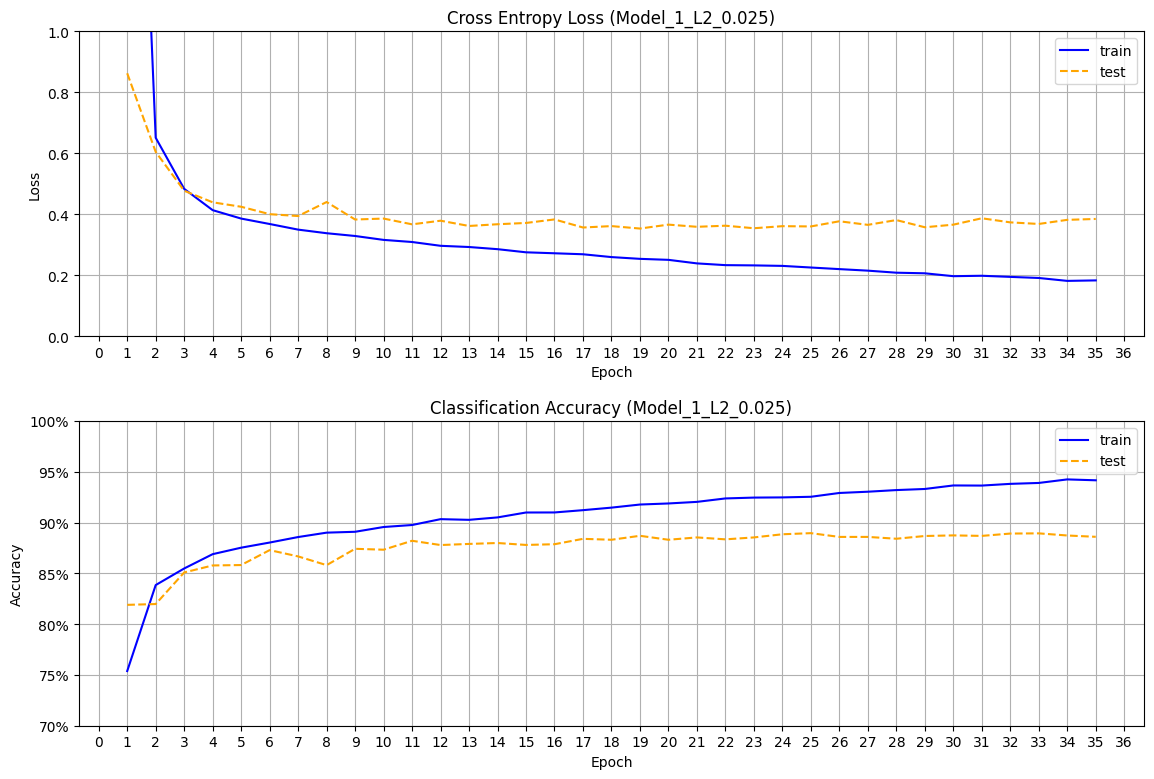

Summarize for: (Model_1_no_reg)


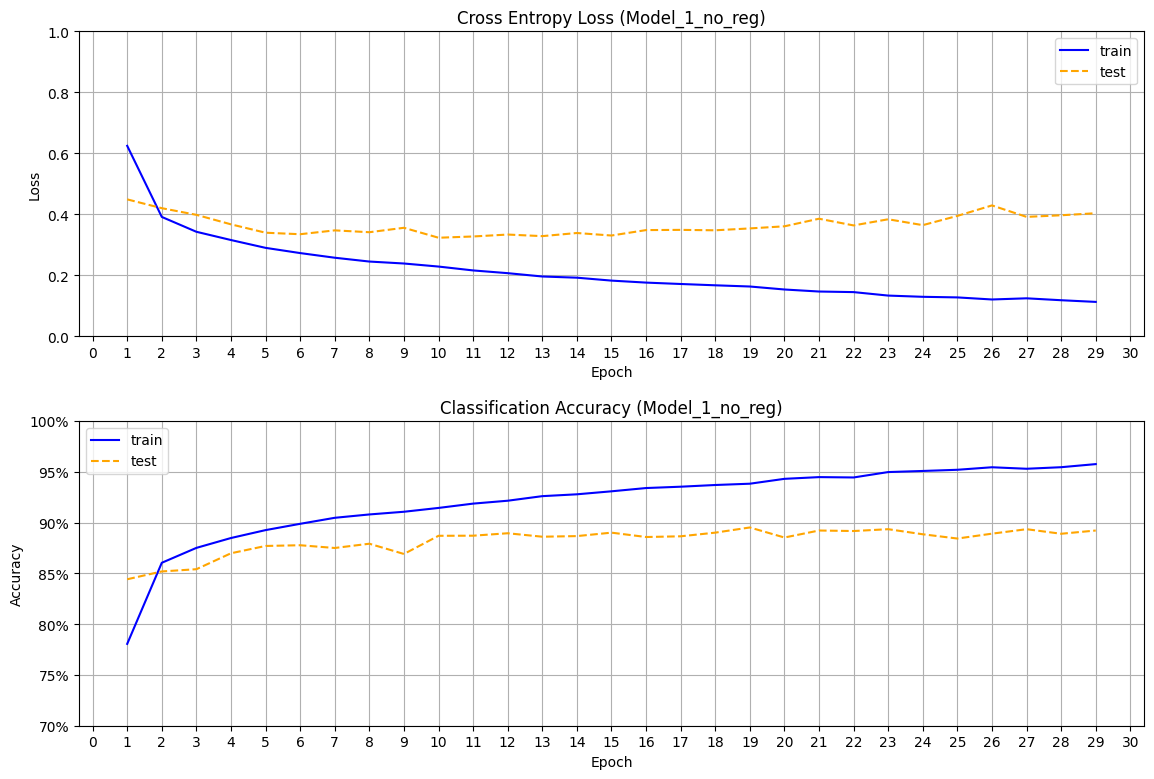

Summarize for: (Model_1_L2_0.1)


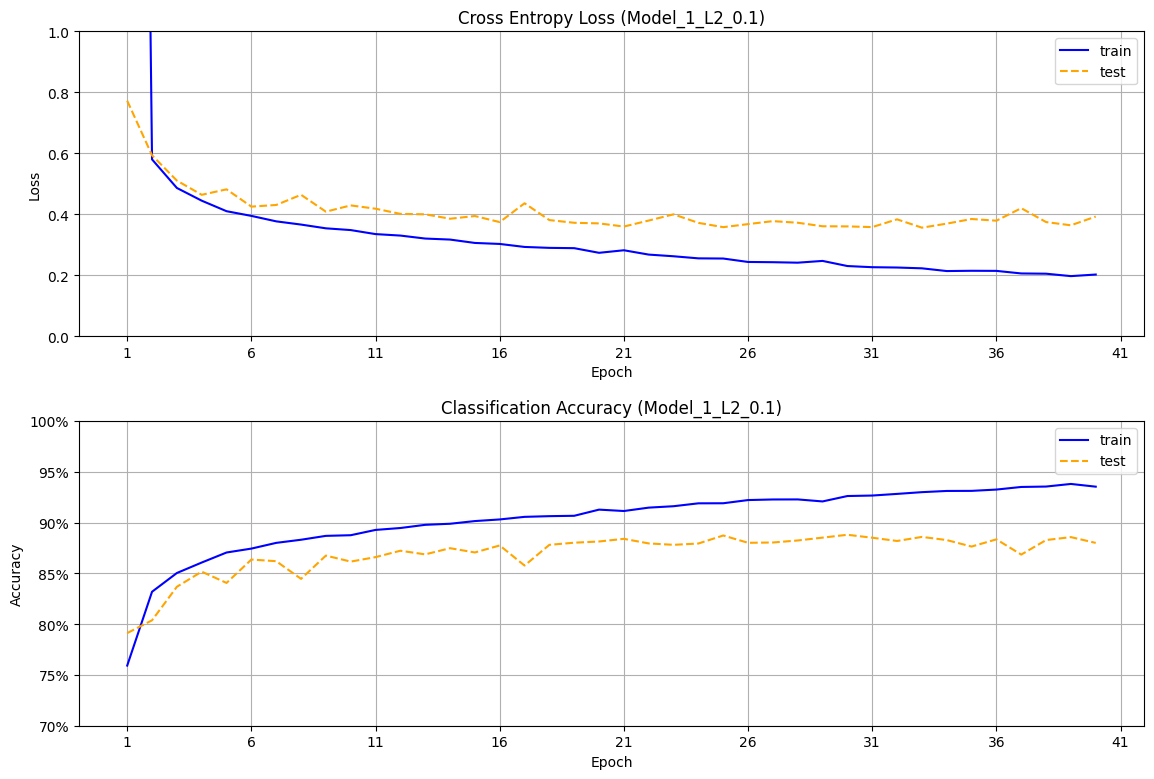

Summarize for: (Model_2)


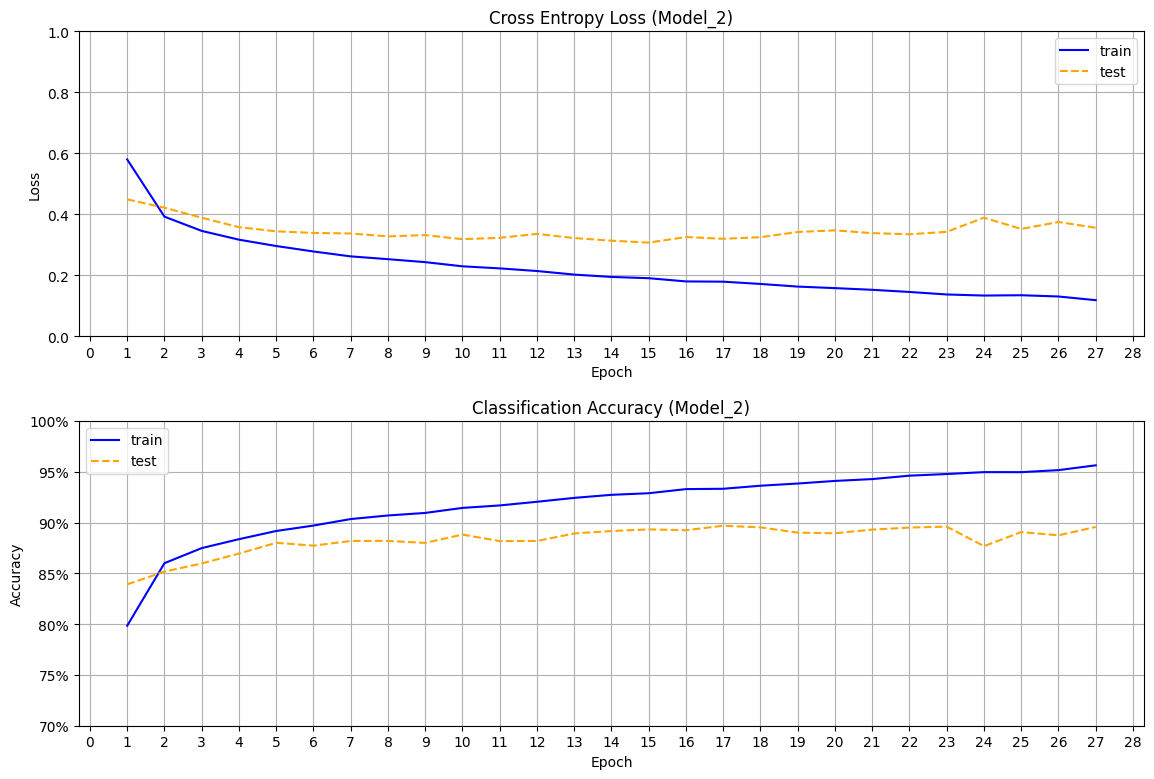

Summarize for: (Model_2_L2_0.1)


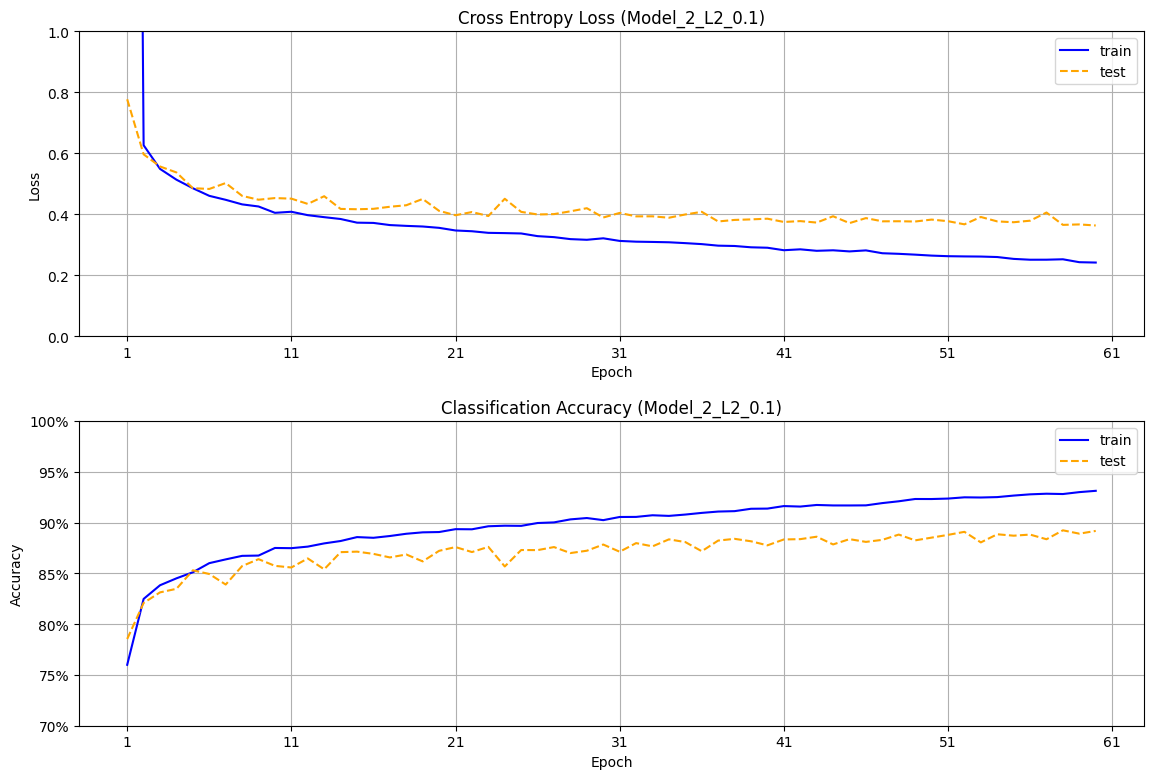

Summarize for: (Model_2_L2_1)


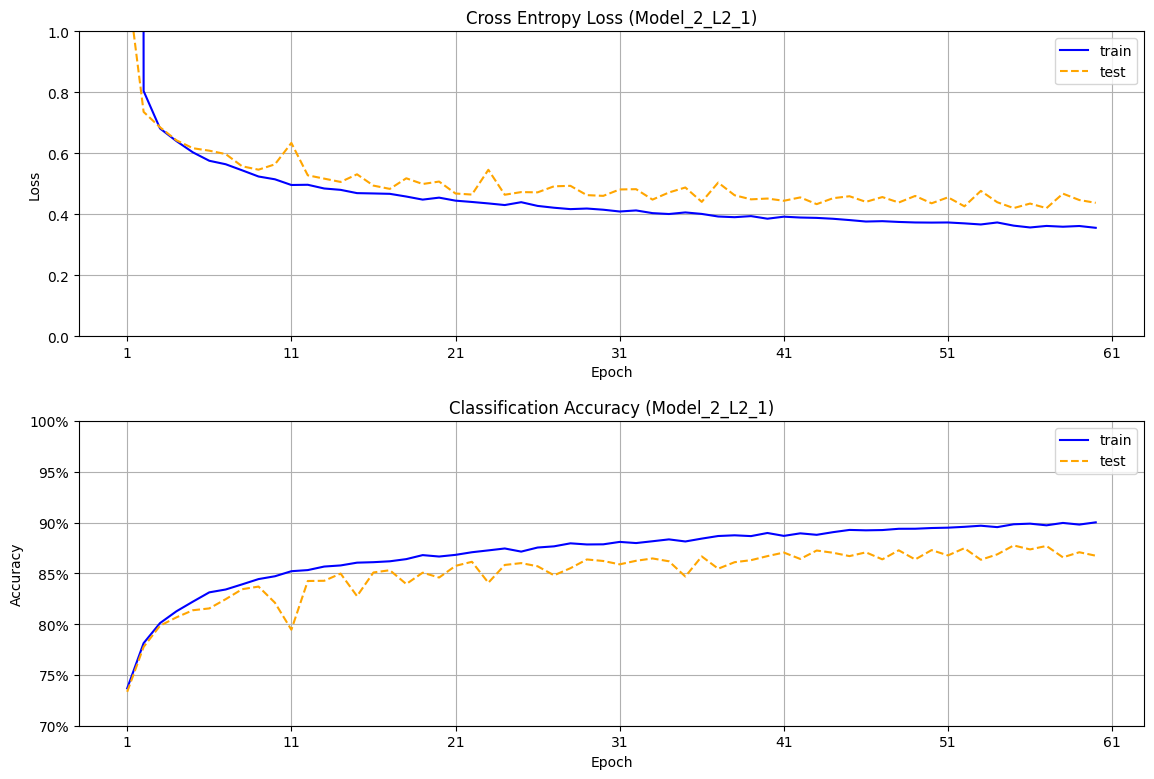

In [195]:
for name, models_h in models_his.items():
  #print(name)
  summarize(models_h, f"({name})")

## Reports

In [196]:
test_pred_values = {}
for name, models_h in models_his.items():
  print(name,models[name].name)
  test_pred = models[name].predict(x_test, batch_size=batch_size, use_multiprocessing=True)
  test_pred_values[name] = tf.math.argmax(test_pred, axis=1)

Model_1_L2_0.025 Model_1_L2_0.025
23/23 [==============================] - 0s 18ms/step
Model_1_no_reg Model_1_no_reg
23/23 [==============================] - 0s 16ms/step
Model_1_L2_0.1 Model_1_L2_0.1
23/23 [==============================] - 0s 17ms/step
Model_2 Model_2
23/23 [==============================] - 0s 9ms/step
Model_2_L2_0.1 Model_2_L2_0.1
23/23 [==============================] - 0s 9ms/step
Model_2_L2_1 Model_2_L2_1
23/23 [==============================] - 0s 9ms/step


Classification report for: 'Model_1_L2_0.025'
                 precision    recall  f1-score   support

0 - T-shirt/top       0.87      0.82      0.85      1000
1 - Trouser           0.99      0.97      0.98      1000
2 - Pullover          0.82      0.79      0.80      1000
3 - Dress             0.91      0.89      0.90      1000
4 - Coat              0.77      0.86      0.81      1000
5 - Sandal            0.98      0.96      0.97      1000
6 - Shirt             0.72      0.72      0.72      1000
7 - Sneaker           0.91      0.98      0.94      1000
8 - Bag               0.97      0.97      0.97      1000
9 - Ankle boot        0.97      0.94      0.96      1000

       accuracy                           0.89     10000
      macro avg       0.89      0.89      0.89     10000
   weighted avg       0.89      0.89      0.89     10000

Accuracy: 88.96%
Confusion matrix for: 'Model_1_L2_0.025'


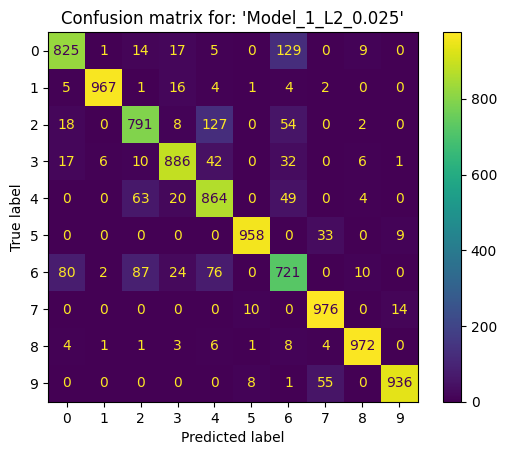

['0 - T-shirt/top', '1 - Trouser', '2 - Pullover', '3 - Dress', '4 - Coat', '5 - Sandal', '6 - Shirt', '7 - Sneaker', '8 - Bag', '9 - Ankle boot']
------------------------------------------------------------ 

Classification report for: 'Model_1_no_reg'
                 precision    recall  f1-score   support

0 - T-shirt/top       0.81      0.89      0.85      1000
1 - Trouser           0.99      0.98      0.98      1000
2 - Pullover          0.77      0.86      0.81      1000
3 - Dress             0.88      0.92      0.90      1000
4 - Coat              0.85      0.79      0.82      1000
5 - Sandal            0.97      0.97      0.97      1000
6 - Shirt             0.80      0.65      0.72      1000
7 - Sneaker           0.95      0.95      0.95      1000
8 - Bag               0.97      0.98      0.98      1000
9 - Ankle boot        0.97      0.96      0.96      1000

       accuracy                           0.90     10000
      macro avg       0.90      0.90      0.89     10000
   

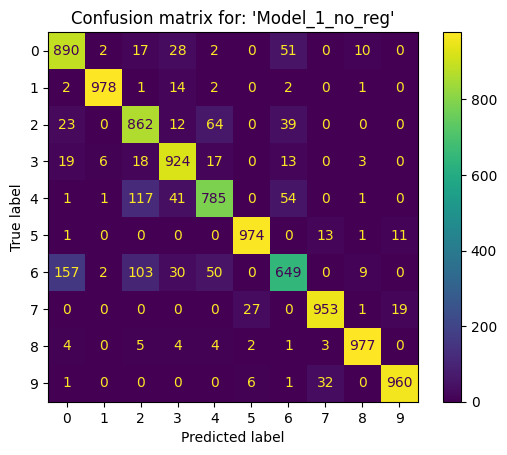

['0 - T-shirt/top', '1 - Trouser', '2 - Pullover', '3 - Dress', '4 - Coat', '5 - Sandal', '6 - Shirt', '7 - Sneaker', '8 - Bag', '9 - Ankle boot']
------------------------------------------------------------ 

Classification report for: 'Model_1_L2_0.1'
                 precision    recall  f1-score   support

0 - T-shirt/top       0.83      0.83      0.83      1000
1 - Trouser           0.99      0.97      0.98      1000
2 - Pullover          0.81      0.81      0.81      1000
3 - Dress             0.90      0.89      0.89      1000
4 - Coat              0.82      0.80      0.81      1000
5 - Sandal            0.95      0.98      0.96      1000
6 - Shirt             0.70      0.73      0.72      1000
7 - Sneaker           0.95      0.95      0.95      1000
8 - Bag               0.96      0.98      0.97      1000
9 - Ankle boot        0.97      0.95      0.96      1000

       accuracy                           0.89     10000
      macro avg       0.89      0.89      0.89     10000
   

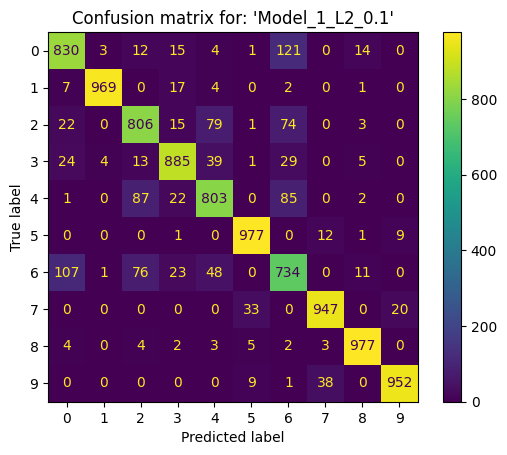

['0 - T-shirt/top', '1 - Trouser', '2 - Pullover', '3 - Dress', '4 - Coat', '5 - Sandal', '6 - Shirt', '7 - Sneaker', '8 - Bag', '9 - Ankle boot']
------------------------------------------------------------ 

Classification report for: 'Model_2'
                 precision    recall  f1-score   support

0 - T-shirt/top       0.87      0.81      0.84      1000
1 - Trouser           0.99      0.98      0.99      1000
2 - Pullover          0.81      0.84      0.82      1000
3 - Dress             0.91      0.90      0.90      1000
4 - Coat              0.82      0.83      0.82      1000
5 - Sandal            0.98      0.96      0.97      1000
6 - Shirt             0.71      0.74      0.73      1000
7 - Sneaker           0.95      0.96      0.96      1000
8 - Bag               0.97      0.98      0.98      1000
9 - Ankle boot        0.96      0.97      0.96      1000

       accuracy                           0.90     10000
      macro avg       0.90      0.90      0.90     10000
   weighte

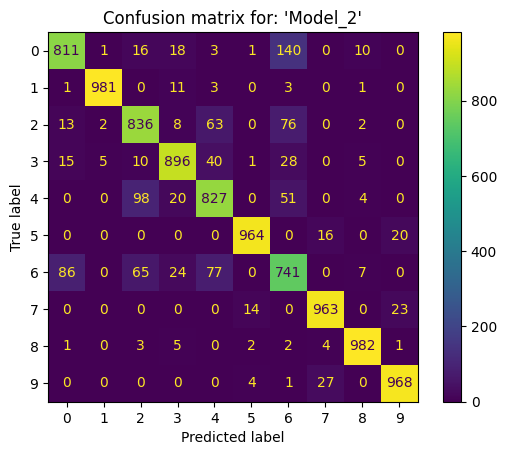

['0 - T-shirt/top', '1 - Trouser', '2 - Pullover', '3 - Dress', '4 - Coat', '5 - Sandal', '6 - Shirt', '7 - Sneaker', '8 - Bag', '9 - Ankle boot']
------------------------------------------------------------ 

Classification report for: 'Model_2_L2_0.1'
                 precision    recall  f1-score   support

0 - T-shirt/top       0.85      0.82      0.84      1000
1 - Trouser           0.99      0.97      0.98      1000
2 - Pullover          0.83      0.79      0.81      1000
3 - Dress             0.88      0.91      0.89      1000
4 - Coat              0.80      0.85      0.82      1000
5 - Sandal            0.98      0.96      0.97      1000
6 - Shirt             0.72      0.72      0.72      1000
7 - Sneaker           0.94      0.97      0.95      1000
8 - Bag               0.98      0.97      0.97      1000
9 - Ankle boot        0.96      0.96      0.96      1000

       accuracy                           0.89     10000
      macro avg       0.89      0.89      0.89     10000
   

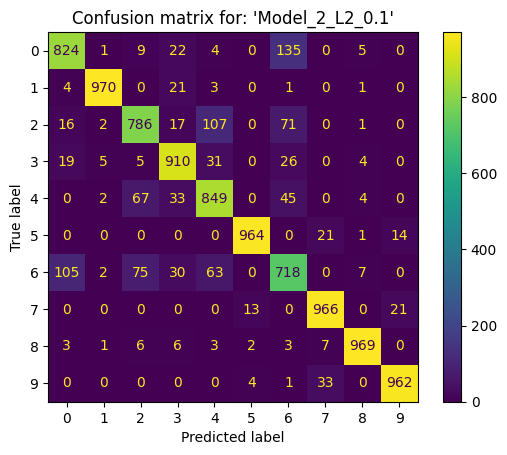

['0 - T-shirt/top', '1 - Trouser', '2 - Pullover', '3 - Dress', '4 - Coat', '5 - Sandal', '6 - Shirt', '7 - Sneaker', '8 - Bag', '9 - Ankle boot']
------------------------------------------------------------ 

Classification report for: 'Model_2_L2_1'
                 precision    recall  f1-score   support

0 - T-shirt/top       0.83      0.82      0.83      1000
1 - Trouser           1.00      0.94      0.97      1000
2 - Pullover          0.80      0.79      0.79      1000
3 - Dress             0.80      0.93      0.86      1000
4 - Coat              0.87      0.62      0.73      1000
5 - Sandal            0.97      0.95      0.96      1000
6 - Shirt             0.62      0.74      0.67      1000
7 - Sneaker           0.93      0.95      0.94      1000
8 - Bag               0.96      0.97      0.96      1000
9 - Ankle boot        0.96      0.96      0.96      1000

       accuracy                           0.87     10000
      macro avg       0.87      0.87      0.87     10000
   we

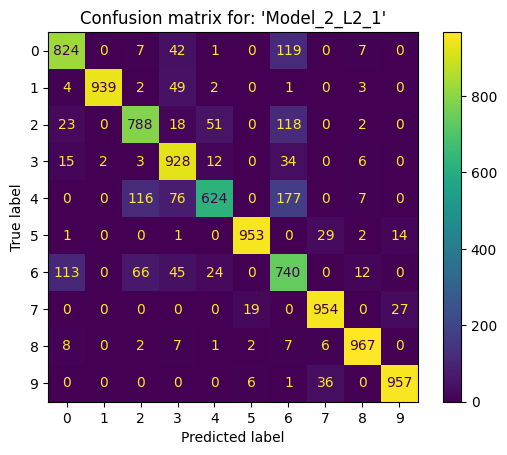

['0 - T-shirt/top', '1 - Trouser', '2 - Pullover', '3 - Dress', '4 - Coat', '5 - Sandal', '6 - Shirt', '7 - Sneaker', '8 - Bag', '9 - Ankle boot']
------------------------------------------------------------ 



In [197]:
target_names = [ f"{i} - {labels[i]:11}" for i in range(0, num_classes)]

for name in models_his.keys():
  print(f"Classification report for: '{name}'")
  print(classification_report(y_test, test_pred_values[name], target_names=target_names))
  cr = classification_report(y_test, test_pred_values[name], target_names=target_names, output_dict=True)
  print(f'Accuracy: {cr["accuracy"]:.2%}')
  print(f"Confusion matrix for: '{name}'")
  confusion_matrix(y_test, test_pred_values[name])
  ConfusionMatrixDisplay.from_predictions(y_test, test_pred_values[name])
  plt.title(f"Confusion matrix for: '{name}'")
  plt.show()
  print(list(map(lambda x: x.strip(),target_names)))
  print("-"*60,"\n")

## Порівняння моделей за val. accur.

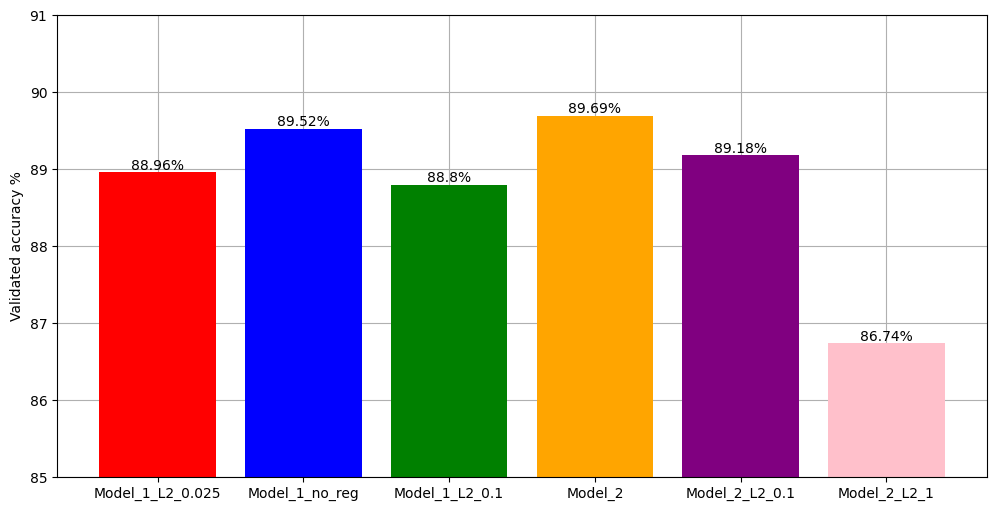

In [200]:
bar_y = [ results[m][1]*100 for m in models ]

plt.figure(figsize=(12,6))
plt.grid()
plt.gca().set_axisbelow(True)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink']
bars = plt.bar(x=models.keys(), height=bar_y, color=colors)
for bar, value in zip(bars, bar_y):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{value:.4}%", ha='center', va='bottom')

plt.ylim(85,91)
plt.ylabel("Validated accuracy %")
plt.show()

## Візуалізація прогнозу

Model_1_L2_0.025


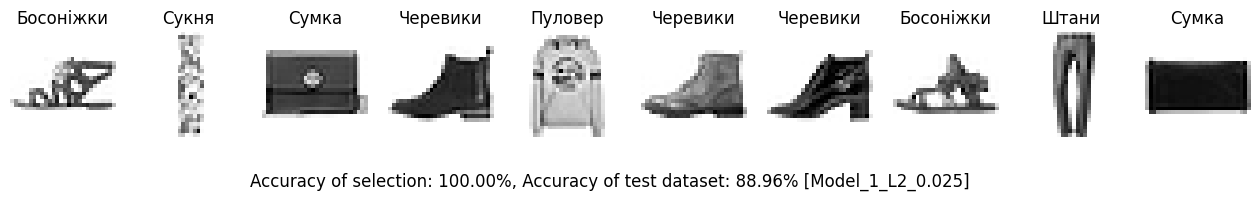

In [199]:
img_selected = 10
random_img_idx = np.random.randint(0, x_test.shape[0], size=img_selected)
#selected_model_name = list(models.keys())[0]
selected_model_name = "Model_1_L2_0.025"
print(selected_model_name)
# Plot the images
colors = [(1, 1, 1), (0.8, 0, 0), (0, 0, 0)]  # white, red, black
custom_cmap = plt.cm.colors.LinearSegmentedColormap.from_list("CustomRed", colors, N=256)

plt.figure(figsize=(16, 5))
pred = 0
for i, idx in enumerate(random_img_idx, start=1):
    plt.subplot(1, img_selected, i)
    y_pred = test_pred_values[selected_model_name]

    correct = y_test[idx] == y_pred[idx]
    pred += int(correct)
    cmap = 'gray_r' if correct else custom_cmap
    color = "black" if correct else "red"
    plt.imshow(x_test[idx], cmap=cmap)
    title = labels_uk[y_test[idx]] if correct else f'{labels_uk[y_test[idx]]}\n[{labels_uk[test_pred_values[selected_model_name][idx]]}]'
    plt.title(title, color=color)
    plt.axis('off')

acc = pred/img_selected
plt.suptitle(f"Accuracy of selection: {acc:.2%}, Accuracy of test dataset: {results[selected_model_name][1]:.2%} [{selected_model_name}]")
plt.subplots_adjust(top=2.2)
plt.show()